# **Neural Networks classification and the MNIST and Fashion MNIST Datasets**


## **Sri Vishnu Vardhan Kavili**

**https://colab.research.google.com/drive/1s2_X2SWslDBarhKh_GJ1yxHBDhEmEVls?usp=sharing**

Useful references and sources:

**MNIST**

- https://www.tensorflow.org/datasets/catalog/mnist

- https://en.wikipedia.org/wiki/MNIST_database 

- https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb 

**Fashion MNIST**

- https://www.tensorflow.org/datasets/catalog/fashion_mnist

- https://en.wikipedia.org/wiki/Fashion_MNIST

- https://keras.io/api/datasets/fashion_mnist/

# **PART 1 - MNIST classifier using MLP**




#### **Import Needed Resources / Libraries**

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from keras import layers

from matplotlib import pyplot as plt

import numpy as np
import tensorflow as tf

#### **Load and prepare the data**

In [ ]:
# Apart the standard comments mentioned by the professor, I'm writing all the other comments for my own understanding.

# So, intially, we always have to specify the "length of output scale" - Usually will be an array size.
# Next, w specify the "dimensions" of the given input.

# Model / data parameters
num_classes = 10
# So, basically, "num_classes" variable is used to determine the pattern of the in the output, of the output layer, which is represented in an array. 
# From that array, the output that we are looking for, will be at a certain index position. The value in that particular index position, will be 
# assigned "1", by our neural netwotk, whereas, all the other index position will have the value "0". This happens at the validation level. 
# This concept will specifically come into action, when we are using the number detection from the MNIST dataset.

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data() # Also, when we run this, the values that get populated in the X_train and y_train wouldn't necessarily be sorted.

11490434/11490434 [==============================] - 0s 0us/step


#### **Examine Data**

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

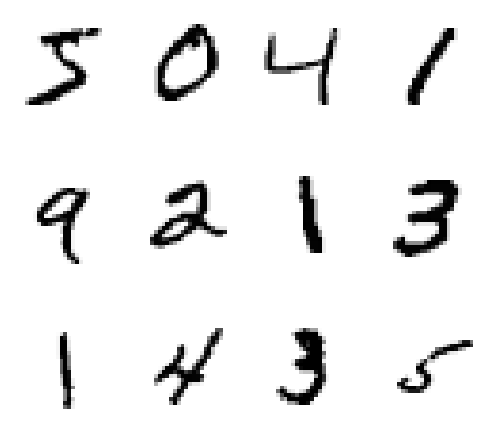

In [ ]:
plt.figure(figsize=(5,5)) # The size of the overall picture given below. Basically, the "area of square-(a, a)" or "area of rectangle-(l, b)"
for k in range(12): # We times this loop runs = the number of digits that we want to display from the data.
    plt.subplot(3, 4, k+1) # the subplot is responsible to denote the "shape" of display of the data in thr "rows" and "columns" structure. The k+1 determines the index position of the current plot.
    plt.imshow(X_train[k], cmap='Greys') # the imshow() method is used to display the image at that index position "k", of the particular subplot, from the X_train set. And the cmap determines the "color" that each image should be displayed in. Eg: brg 
    plt.axis('off') # removes the axes and labels from the current subplot, so only the image is displayed. 
plt.tight_layout() # Fits the subplots correctly, trimming the spaces between them.
plt.show() # Displays the overall result.


# NOTE: Take a look at the output fromthe previous cell, we ran y_train, and in this cell, we ran X_train. So, both the outcomes are same. 
# Meaning: The contents in both the outputs are "exactly the same". But the formats are different. So, here, we have note one fundamental concept
# about the X_train and y_train output. So, y_train contains the "labels", whereas, our X_train contains the "actual images" of those label. 
# So, we are basically, telling our model that, given this image of sample of the X set which is X_train, predict the labels of these images
# and store them in an array, which is y_train. So, in a whole context, we feed the model, the relationship between the input an output, so thet
# the model understands it, and will give the the desired output during the testing phase.

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

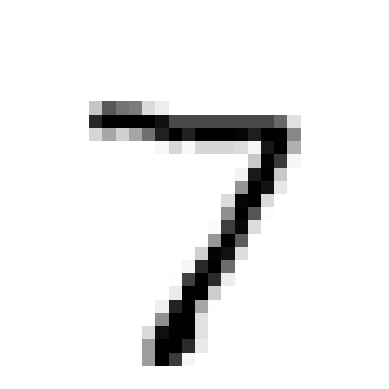

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
  # We are "dividing the values with 255" because it is the maximim value of intensity that our "MNIST" data has. 0 is the "DARKEST", and 255 is the "BRIGHTEST" one.
  # larger the scaled value, better the "scaled output" 
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices

  # In both the below steps, we aim to convert out categorical data to binary. The OneHotEncoder method. 
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
# In this, there is no prediction happening. We are just showing how the categorical data - "7", is converted to the binary version of it, as below.
# [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], based on the num_classes attribute, For the explanation of this, look at the first cell.
info = "Based on the information that the Network received from the hidden layers, this  value will be given to the output layer, which will be help in brighting the neuron in the corresponding index position";
print(f"{y_valid[0]} -----> {info}")
print(f"{y_validation[0]} -----> # We will expect this format to be as an output by our model.")

7 -----> Based on the information that the Network received from the hidden layers, this  value will be given to the output layer, which will be help in brighting the neuron in the corresponding index position
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] -----> # We will expect this format to be as an output by our model.


#### **Configure model**

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,))) # So, here we have units=64 which means, there are "64 Neurons" in a dense layer, and each neuron will have 784 inputs connected to it.
# the comma in the input_shape method is to seperate the (rows, column) structure. Here, we divide everything only to "rows". So we don't have columns here".
model.add(Dense(10, activation='softmax'))

# layers.Dense method version
# model = keras.Sequential([
#     layers.Dense(64, activation='sigmoid', input_shape=(784,)),
#     layers.Dense(10, activation='softmax'),
# ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64 # This  is basically the expression that denotes as below:
# (no.of neurons * total no of weights that are connected to it from the previous layer) + bias

50240

In [ ]:
(10*64)+10

650

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer=SGD(learning_rate=0.01), # Stochastic Gradient Descent. The learning_rate, will tell the stepsize of the descent/flow of the gradient descent. 
    metrics=['accuracy']
)

#### **Train!**

In [ ]:
batch_size=128
epochs=200

# So below, we give the training data, with the mdofied validation data, which will make the prdictions with the help of the given optimizer,
# and will give the outputs accordingly
history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/200
469/469 [==============================] - 8s 7ms/step - loss: 0.0962 - accuracy: 0.1180 - val_loss: 0.0938 - val_accuracy: 0.1319
Epoch 2/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0925 - accuracy: 0.1431 - val_loss: 0.0917 - val_accuracy: 0.1482
Epoch 3/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0911 - accuracy: 0.1536 - val_loss: 0.0908 - val_accuracy: 0.1573
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.1643 - val_loss: 0.0902 - val_accuracy: 0.1707
Epoch 5/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0898 - accuracy: 0.1768 - val_loss: 0.0897 - val_accuracy: 0.1850
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.1918 - val_loss: 0.0893 - val_accuracy: 0.1980
Epoch 7/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0890 - accuracy: 0.2104 - val_loss: 0.0890 - val_accuracy: 0.2161

#### **Plot learning curves**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


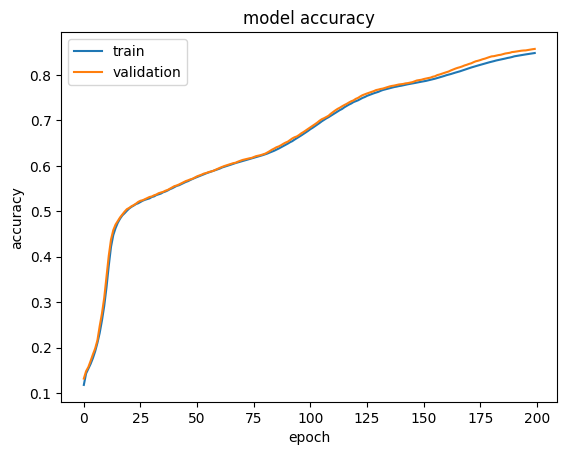

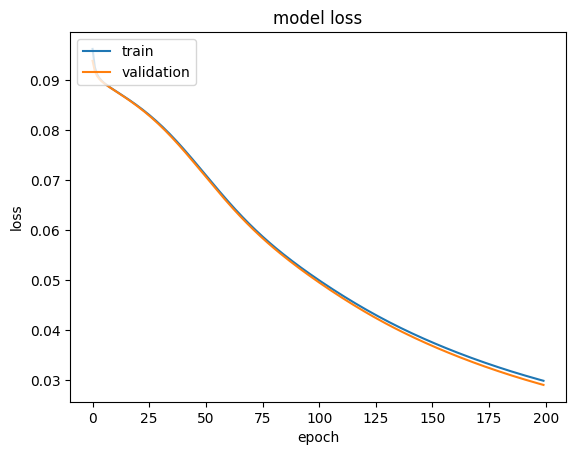

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### **Evaluate the model**

In [ ]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0291 - accuracy: 0.8573


[0.029114609584212303, 0.8572999835014343]

#### **PART 1 Contd..** - **CONFUSION MATRIX Implementation, and other specific aspects of our model**


In [ ]:
# print(y_training[0], y_validation[0])

from sklearn.metrics import confusion_matrix

# Each prediction array, denotes the entire completion of one forward propagation. And, the size of ech prediction will be equal to the number
# of neurons in the output layer. We will be taking the highest value / the highest probility, of them all.
populatedHighestProbabilityValue = [] # In this array, we store the "index position" of the value that have the highest probability in each prediction array from the total prediction array 

def fetchIndex(arr, currIdxofPredictionSubArray):
  # Below we collect the index value of the max value in the current prediction array
  populatedHighestProbabilityValue.append(np.where(arr == np.max(arr))[currIdxofPredictionSubArray][0])

predictedValuesFomTheX_ValidationSplit = model.predict(X_validation) 
currIdxofPredictionSubArray = 0 # Keeps track of the index of the current prediction array of the total prediction array 
for arr in predictedValuesFomTheX_ValidationSplit:
  fetchIndex(arr, currIdxofPredictionSubArray)
if currIdxofPredictionSubArray <= len(arr): currIdxofPredictionSubArray = currIdxofPredictionSubArray + 1
else: currIdxofPredictionSubArray = 0

print(populatedHighestProbabilityValue, end="\n\n\n")

cm = confusion_matrix(y_valid, populatedHighestProbabilityValue)

# Display the confusion matrix as text
print("Confusion Matrix:", end="\n\n")
print(cm)


313/313 [==============================] - 1s 1ms/step
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 3, 9, 7, 3, 4, 7, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 3, 2, 4, 4, 6, 3, 5, 5, 2, 0, 4, 1, 9, 7, 7, 8, 9, 2, 7, 9, 2, 4, 3, 0, 7, 0, 2, 8, 1, 7, 3, 7, 8, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 1, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 1, 3, 9, 7, 4, 4, 4, 9, 2, 3, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 3, 4, 4, 1, 4, 4, 7, 3, 3, 2, 1, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 4, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 5, 7, 3, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 8, 3, 8, 4, 2, 6, 0, 2, 4, 2, 9, 1, 9, 5, 7, 7, 2, 1, 2, 0, 8, 1, 7, 7, 9, 1, 8, 1, 3, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 7, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 1, 7, 1, 2, 9, 0, 2, 9, 4, 3, 3, 0, 0, 5, 1,

#### **CONFUSION MATRIX - What exactly is it ??**

The very ***ESSENCE*** of the word "**CONFUSION MATRIX**" is that "How many prediction that our model made, by getting confused during it's prediction phase". In other words, how many predictions were "falsly" mistaken to be one, but in reality has to be the other. The values in it, denotes, how strong the detection of the model is, with respect to the "Given **TRUE VALUE**(which is the value that will be segmented from the dataset itself) and the "**OUTPUT PREDICTED VALUES**" that we receive from our Input Validation/Test set.".

The "**PERFECTLY IDENTIFIED**" values will fall in the "**DIAGONAL**" section of the matrix. Which we technically call as "**TRUE POSITIVES**(Our model has guessed it right! Perfectly)".

The values where the value of the m = row and n = column, are not equal(to be precise, value at m != n), it is the place where our model has made "**FALSE INTERPRETATIONS**". Those magnitude of those values, represent the "count" of the times our model failed to interpret correctly. Which we call "**FALSE POSITIVES**(The occurance actualy have to be **NEGATIVE**. But it has falsy interpreted that to be as **POSITIVE**)" and "**FALSE NEGATIVES**(The occurance actualy have to be **POSITIVE**. But it has falsy interpreted that to be as **NEGATIVE**)".

The "**TRUE NEGATIVES**" is the part where our model predicted that to be "not the case", during the "m != n" case. That means, if we see a value in a position where m != n, to be "0", then that places are called "**TRUE NEGATIVES**" 

#### **2. Displaying a 10 cases where the classifier makes mistakes with the falsy predictions**

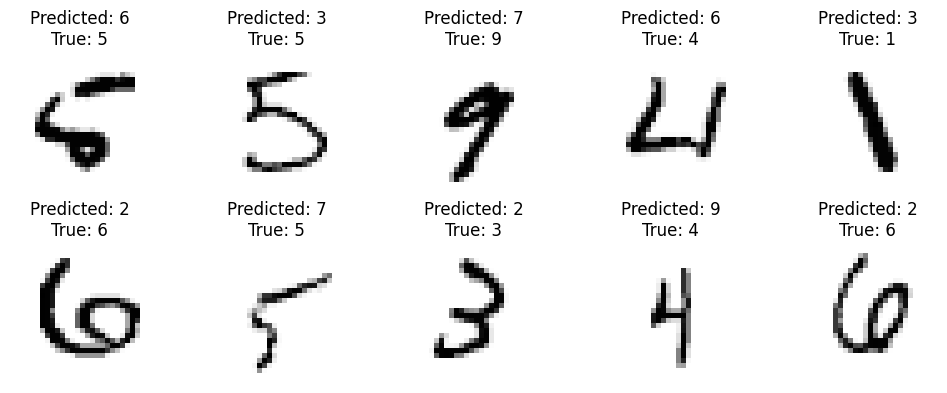

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# In this cell we fetch all the values of the indices from the pridicted set, and the validation set which doesn't match, at the current position
# Ex: predicted_set = [2, 5, 1, 7]
# Ex: validation_set = [7, 8, 2, 1]
# The values in the index positions doesn't match. That is what we are looking for. We want to take the index of such unmatching values.
# Note that those values are again the index positions of the neuron in the outer layer, which in turn represent the digits from our MNIST data.

# Assuming you have the predicted labels in y_pred and true labels in y_true

# Find the indices where the values in the y_valid split that was given by our MNIST dataset, and the values that we had got from the don't match
mistakeIndices = np.where(populatedHighestProbabilityValue != y_valid)[0]
# print('mistakeIndices', mistakeIndices)
# print('populatedHighestProbabilityValue', populatedHighestProbabilityValue)

# Set the number of rows and columns for the grid
numRows = 2
numCols = 5

# Create a figure and axes for the grid layout
fig, axes = plt.subplots(numRows, numCols, figsize=(10, 4))

# Now, in the below loop, we grab the index positions, from our, mistakeIndices, in each and every iteration of the loop, untill we reach 
# "the end of our mistakeIndices array" and look for the value that is in the same index position for the predicted and true values. 
# Doing, so, we can get what exactly was in "that" index position of the true value and the predicted value. Then finaly we plot those 
# values, which are the index positions of each neuron in the output layer, which itself represents the responsible digit in the MNIST data. 
# Once we get those values, we plot them.

# So basically we are doing the reverse case of where our model might go wrong, if the entire training process migh have gone wrong.
for i, ax in enumerate(axes.flat):
    if i < len(mistakeIndices):
        index = mistakeIndices[i]
        # print('index', index)
        predictedLabel = populatedHighestProbabilityValue[index]
        # print('predictedLabel', predictedLabel)
        trueLabel = y_valid[index]
        # print('trueLabel', trueLabel)
        image = X_validation[index].reshape(28, 28)  # Reshape the flattened image

        ax.imshow(image, cmap='Greys')
        ax.set_title(f"Predicted: {predictedLabel}\nTrue: {trueLabel}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


# **PART 2 - Fashion MNIST**

"***Another popular dataset from MNIST which this time will have piece of clothing or any other attire.***"




#### **Load and prepare the data**

In [ ]:
# Model / data parameters
num_classes = 10

In [ ]:
# Loading and Spliting Data in Test and Train 
(X_train, y_train), (X_valid, y_valid) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_valid.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_valid.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


#### **Defining Classes**

In [ ]:
classes_names = ['T-shirt/top' ,  'Trouser' ,'Pullover' , 'Dress', 'Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle Boot'] 

#### **Examine Data**

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_train[0:12]

# The labels in the Fashion MNIST dataset are represented as numbers. Each clothing category in the dataset is assigned a unique numeric label. 
# Below is the mapping of the numeric labels to clothing categories:

# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
# 5: Sandal
# 6: Shirt
# 7: Sneaker
# 8: Bag
# 9: Ankle boot

# In the output, the array [9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9] represents the labels for the first 12 examples in the training dataset. 
# Each number corresponds to a specific clothing category according to the mapping mentioned above.

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

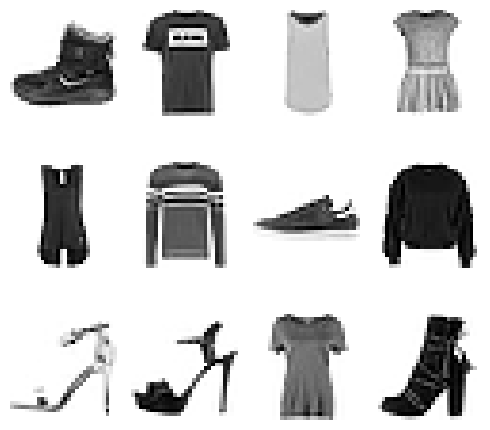

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

9

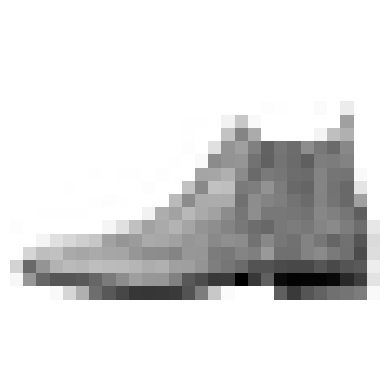

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

# As we can see below, the resolution is way too higher. This will result in lesser accuracy value

#### **Configuring the Model from here**

###### **NOTE: Additional code to demonstrate possible improvements to the model in Part 2, is provided in the same cells which has the current code**


#### **Training the Model**

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,))) # So, here we have units=64 which means, there are "64 Neurons" in a dense layer, and each neuron will have 784 inputs connected to it.
# the comma in the input_shape method is to seperate the (rows, column) structure. Here, we divide everything only to "rows". So we don't have columns here".
model.add(Dense(10, activation='softmax'))

model.summary()

################################################ OPTIMIZED NETWORK #####################################################
  
# I would use the following network, which include normalization techniques to make the training process more smooth.
# Both the Batch Normalization case, and the Non Batch Normaliation case, "a random batch will be  sent". But in the case of Batch Normalization,
# The sent batch, "will be normalized". The only difference in both the case is the "batch being subjected to normalization"

# model = keras.Sequential([
#     layers.BatchNormalization(input_shape=(784,)),
#     layers.InputLayer(input_shape),
#     layers.Dense(64, activation="relu"),
#     layers.BatchNormalization(),
#     layers.Dropout(0.3),
#     layers.Dense(64, activation="relu"),
#     layers.BatchNormalization(),
#     layers.Dropout(0.3),
#     layers.Dense(10, activation='sigmoid'),
# ])


################################## DESCRIPTION ON THE PARAMETERS USED ABOVE ######################################

# Mini-Batch - Each Layer/Channel will get a random batch, that is the again a randomly selected training data from the entire training data
# during the training process

# BATCH-NORMALIZATION DURING TRAINING:
#   Batch Normalization adjusts the mean and variance performed by subtracting the batch mean and dividing by the batch standard deviation 
#   of the inputs within a "mini-batch", which helps in scaling down the values of the inputs and improving the training process of the network. 
#   To ensure to not fall into exploding gradient, and the same time also not into vanishing gradient, Batch Normalization is used to maintain 
#   the correct weighted inputs to get a stable outcome from each neuron in an each layer. So, on a whole, we are protecting the layer from 
#   behaving abnormaly, through Batch Normalization. 

# BATCH-NORMALIZATION DURING TESTING:
#   The Batch Normalization again takes place in testing phase too, but this time, it does not calculate the mean and standard deviation fro each
#   layer. But it "USES" the same "MEAN" and "STANDARD DEVIATION" that it has found in the training phase. Look at the example below:
#    during the training phase, the means that we found out using batch normalization for the layers are as below
#       1) Layer 1 - 1.34
#       2) Layer 2 - 2.34
#       3) Layer 3 - 1.07
#   The above values are learned by the network, and the same value will be used for the same layers during the testing phase for Batch Normalization.


# DROPOUT DURING TRAINING:
#   The Dropout whereas, deactivates random fraction/number of neurons in the given layer. By doing so, the network can understand as to which 
#   set of neurons might be responsible for either vanishing or exploding gradient. Also, The dropout is applied right after the loss 
#   is calculated, as it is a regulization technique. And we do this only during the "training" phase. "NOT" during the testing phase.


# DROPOUT DURING TESTING:
#   Dropout is not applied during the testing phase. During testing, the entire network, including all neurons, is used to make predictions 
#   on new data. Dropout is a regularization technique that is specifically designed to be applied during the training phase to prevent 
#   overfitting and improve generalization. Once the training is complete, dropout is typically turned off, and the network is used in its 
#   entirety for making predictions on unseen data.



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Here, we add the compiler for our model. The compiler is responsible for performing getting the Gradient value. The gradient is found for 
# each layer. After this step the weights wil be updated. And the new optimized weights will be assigned. This happens during Back Propogation.

model.compile(
    loss='mean_squared_error', 
    optimizer=SGD(learning_rate=0.01), # Stochastic Gradient Descent. The learning_rate, will tell the stepsize of the descent/flow of the gradient descent. 
    metrics=['accuracy']
)

################################################ CODE FOR OPTIMIZED COMPILER #####################################################

# The below compiler can be used for better accuracy, eventhough the input images have extremely low resolutuion. Only to prove that we have
# "LOW RESOLUTION" images, which results in lesser accuracy, we are using the "SAME" compiler as used for the Number MNIST dataset.

# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['binary_accuracy'],
# )

In [ ]:
# Now, in this cell, we are going to load our dataset which we are going to work on, which in MNIST data in our case, 
# and normalize the given data, as we have to bring the input labels that we give, down to the numbers that match the Gray scale(0 to 1).
from keras.datasets import fashion_mnist

(X_train, y_train), (X_valid, y_valid) = fashion_mnist.load_data()

# Coverting given data from categorical to binary
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

# print(y_valid[0], y_validation[0])


# Converting the pixels of each images to floating integers to get the samller representation of the actual number of low magnitiude.
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# The 255 is the brightest colour in the gray scale(measurements taken according to the MNIST Standards). Here we scale thos values to 0 to 1.
# We are not changing any value. We are just reducing the shape of them.
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# We rename for better interpretation of the variable that has the data that we feed our model with
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


#### **Plot learning curves** 

#### **Train!**
In this phase, we are going to fit our data.


In [ ]:
batch_size=128
epochs=20

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0932 - accuracy: 0.1396 - val_loss: 0.0921 - val_accuracy: 0.1579
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0914 - accuracy: 0.1592 - val_loss: 0.0908 - val_accuracy: 0.1672
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0904 - accuracy: 0.1713 - val_loss: 0.0899 - val_accuracy: 0.1831
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0896 - accuracy: 0.1810 - val_loss: 0.0892 - val_accuracy: 0.1900
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0889 - accuracy: 0.1998 - val_loss: 0.0885 - val_accuracy: 0.2143
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0883 - accuracy: 0.2229 - val_loss: 0.0879 - val_accuracy: 0.2349
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0877 - accuracy: 0.2425 - val_loss: 0.0874 - val_accuracy: 0.2613
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


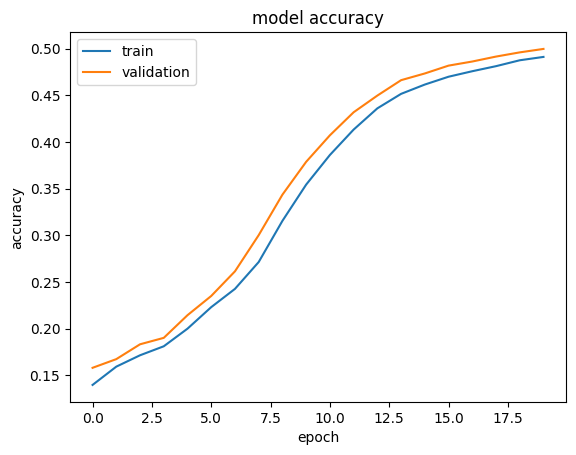

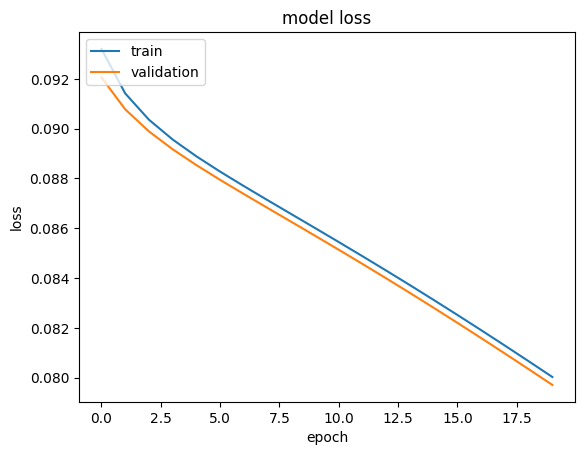

In [ ]:
# lists all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# As we can see below, there is "huge overfitting" result, as we have lower resolution images.


################################################ PLOT FOR OPTIMIZED CODE #####################################################

# If we were to change the the structure of the Network, and the compiler are mentioned in the previous cells, we get have the below plot to include.

# Then the plot would follow the below steps

# print(history.history.keys()) # This will give the history of the status of flow of the progress of our model that has happened during
# the training process(which talks about loss), and the validation process(which talks about the accuracy) 

# summarize history for accuracy(drawing the plot of the status as the epochs progress)
# plt.plot(history.history['binary_accuracy'])
# plt.plot(history.history['val_binary_accuracy'])
# plt.title('model binary_accuracy')
# plt.ylabel('binary_accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

# # summarize history for loss(drawing the plot of the status as the epochs progress)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()


#### **CONFUSION MATRIX for this classifier**

In [ ]:
# Your confusion matrix code here and in additional code cells as needed

from sklearn.metrics import confusion_matrix

# Each prediction array, denotes the entire completion of one forward propagation. And, the size of ech prediction will be equal to the number
# of neurons in the output layer. We will be taking the highest value / the highest probility, of them all.
populatedHighestProbabilityValue = [] # In this array, we store the "index position" of the value that have the highest probability in each prediction array from the total prediction array 

def fetchIndex(arr, currIdxofPredictionSubArray):
  # Below we collect the index value of the max value in the current prediction array
  populatedHighestProbabilityValue.append(np.where(arr == np.max(arr))[currIdxofPredictionSubArray][0])

predictedValuesFomTheX_ValidationSplit = model.predict(X_validation) 
currIdxofPredictionSubArray = 0 # Keeps track of the index of the current prediction array of the total prediction array 
for arr in predictedValuesFomTheX_ValidationSplit:
  fetchIndex(arr, currIdxofPredictionSubArray)
if currIdxofPredictionSubArray <= len(arr): currIdxofPredictionSubArray = currIdxofPredictionSubArray + 1
else: currIdxofPredictionSubArray = 0

print(populatedHighestProbabilityValue, end="\n\n\n")

cm = confusion_matrix(y_valid, populatedHighestProbabilityValue)

# Display the confusion matrix as text
print("Confusion Matrix:", end="\n\n")
print(cm)


313/313 [==============================] - 0s 1ms/step
[9, 4, 1, 1, 2, 1, 4, 2, 7, 7, 4, 7, 7, 1, 4, 1, 4, 4, 9, 0, 0, 7, 7, 7, 1, 2, 4, 1, 9, 1, 8, 8, 1, 1, 2, 1, 7, 7, 7, 9, 0, 1, 1, 9, 4, 9, 2, 1, 2, 2, 4, 4, 1, 4, 2, 4, 9, 2, 9, 1, 7, 7, 9, 7, 1, 1, 1, 1, 7, 8, 7, 1, 0, 0, 4, 1, 1, 4, 9, 4, 1, 8, 7, 9, 7, 0, 1, 2, 0, 0, 7, 1, 4, 7, 1, 9, 1, 1, 4, 2, 1, 4, 7, 4, 7, 9, 7, 9, 9, 4, 2, 7, 7, 0, 7, 4, 9, 2, 7, 9, 0, 0, 9, 9, 1, 0, 8, 2, 1, 1, 4, 1, 9, 1, 9, 4, 4, 1, 2, 7, 1, 0, 1, 0, 1, 0, 1, 1, 4, 2, 0, 2, 1, 0, 7, 0, 4, 7, 9, 1, 7, 2, 1, 9, 1, 9, 4, 9, 4, 2, 1, 7, 4, 1, 4, 1, 1, 0, 9, 1, 0, 9, 4, 9, 7, 9, 9, 4, 4, 7, 1, 2, 1, 2, 1, 2, 7, 1, 1, 1, 1, 0, 2, 9, 2, 4, 1, 7, 9, 8, 4, 1, 9, 4, 1, 1, 1, 2, 7, 4, 9, 9, 1, 0, 7, 7, 1, 4, 7, 0, 7, 9, 9, 4, 9, 0, 7, 1, 4, 4, 9, 8, 9, 4, 2, 9, 4, 4, 4, 2, 9, 7, 1, 7, 7, 2, 8, 7, 4, 1, 0, 4, 7, 0, 1, 2, 1, 9, 9, 0, 1, 1, 0, 4, 1, 0, 7, 1, 7, 4, 0, 1, 2, 1, 1, 4, 2, 7, 7, 1, 9, 9, 7, 1, 7, 9, 1, 9, 8, 1, 1, 1, 2, 9, 0, 0, 4, 9, 7, 9, 1, 1, 7, 4, 2,

#### **Evaluating the model to identify the accuracy, etc.**

In [ ]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.4997


[0.07970815896987915, 0.49970000982284546]

#### **Discussing the improvements we can give to the Fasion MNIST, to make it to reach the accuracy level of the plain MNIST data.**

1.   I would probably first write a more optimized code
2.   Research on more better optimizer, and study the of gradient, and see what the updated weights would be, compared to other optimizers.
3.   Run some trails with the help of the "early_stopping", and see the behaviour of the results.
4.   Study as to where the loss is accuratley affecting the test output, so that I can add the right "Regulation constant" to our loss and see if I notice any improvements then.
5.   Run couple more trails by tweaking the structure of the neural network with both the aspects - "wide" and "deep". 

